# PCA and filter genes features

## Datas

### Protein Coding

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#from scipy.stats import pearsonr  

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
path_data_prot_coding='/home/thomas/Documents/git/medulloblastoma_cavalli_kaggle/data/in/protein_coding/'
path_metadata_prot_coding = path_data_prot_coding + 'GSE85217_Cavalli_subgroups_information_protein_coding.csv'
path_exp_mat_prot_coding = path_data_prot_coding + 'GSE85217_M_exp_763_MB_SubtypeStudy_TaylorLab_protein_coding.csv'

In [3]:
exp_mat_prot_coding = pd.read_csv(path_exp_mat_prot_coding,index_col=0)
metadata_prot_coding = pd.read_csv(path_metadata_prot_coding,index_col=0)
#exp_mat_prot_coding=exp_mat_prot_coding[metadata_prot_coding.index.tolist()]

In [4]:
#exp_mat_prot_coding=exp_mat_prot_coding.T
#exp_mat_prot_coding=exp_mat_prot_coding.loc[metadata_prot_coding['Study_ID']]

In [5]:
exp_mat_prot_coding_dist = pd.concat([exp_mat_prot_coding.mean(axis=0),exp_mat_prot_coding.median(axis=0),exp_mat_prot_coding.std(axis=0)],axis=1)
exp_mat_prot_coding_dist.columns = ['mean','median','sd']
exp_mat_prot_coding_dist.sort_values(by=['mean','median','sd'],inplace=True)

In [6]:
exp_mat_prot_coding=exp_mat_prot_coding[exp_mat_prot_coding_dist.index.tolist()]
#exp_mat_prot_coding

,IFNA10,OR13C2,OR5M1,OR8H3,SAA1,OR5T1,IFNA7,OR8B3,OR5H1,CAPZA3,...,ACTG1,ACTB,MT-ND4L,HSPA8,MT-ND5,TUBB,MT-ND4,MT-ND1,MT-CO2,MT-CYB
MB_SubtypeStudy_55001,2.091360,2.009553,2.239314,2.326884,2.376575,2.513305,2.880977,2.694464,2.819180,2.754759,...,12.689880,12.821230,12.698190,13.037021,12.777267,12.780518,12.902407,12.819958,12.980663,13.268400
MB_SubtypeStudy_55002,2.238474,2.561271,2.230586,2.293995,2.184620,2.586130,2.369120,3.050169,2.267231,2.268817,...,12.477648,12.726390,13.075663,13.089387,12.926723,12.583692,12.741815,13.172111,13.339813,13.370665
MB_SubtypeStudy_55003,2.082007,1.994942,2.242461,2.474953,2.565776,2.379998,2.720603,2.307820,2.455613,2.518884,...,12.699003,12.795363,13.153330,13.072943,13.173596,12.755944,13.277266,13.330417,13.315571,13.517350
MB_SubtypeStudy_55004,2.207314,2.160792,2.562948,2.839602,2.469513,2.473957,2.836475,2.905933,2.735199,2.684509,...,12.608480,12.623807,12.757017,12.933222,12.981949,12.504544,13.154725,13.095274,13.123729,13.420191
MB_SubtypeStudy_55005,1.992119,2.134755,2.203467,2.147230,2.374656,2.453033,2.638111,2.307870,2.347672,2.544564,...,12.646029,12.887621,12.604549,12.998713,12.671529,12.862943,13.088751,12.910312,13.093950,13.271881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB_SubtypeStudy_55759,2.783872,2.187233,2.298501,2.591276,2.157591,2.466757,2.266913,2.540074,2.687962,2.803874,...,12.533477,12.570389,12.738549,12.695047,12.765508,12.916896,12.717209,13.040581,13.247482,13.250326
MB_SubtypeStudy_55760,2.533886,2.943213,2.229493,2.298840,2.536672,2.372872,2.668095,2.507828,2.495437,2.630185,...,12.401395,12.668623,12.914848,12.802355,12.628417,13.078580,12.863252,13.124919,13.360462,13.336498
MB_SubtypeStudy_55761,4.583117,2.420247,3.375003,3.059081,2.556488,2.552326,2.487154,3.073693,2.370811,2.716262,...,12.649410,12.751741,12.857963,12.642154,12.755225,12.953964,12.710892,12.834137,13.191861,13.236706
MB_SubtypeStudy_55762,2.433738,2.307243,2.424146,2.496688,2.231178,2.753275,2.469470,2.500782,2.531499,2.833435,...,12.789052,12.658976,12.803478,12.949873,12.765284,12.806983,12.806397,12.640040,13.297494,13.307533


In [7]:
# standard scaler
sc = StandardScaler()
exp_mat = sc.fit_transform(exp_mat_prot_coding)

In [8]:
# PCA
pca = PCA()
pca_embedded = pca.fit_transform(X=exp_mat)

In [9]:
exp_vars_ratio = np.cumsum(pca.explained_variance_ratio_)

In [10]:
pos_exp_vars_ratio = len([i for i in exp_vars_ratio if i <= 0.95])

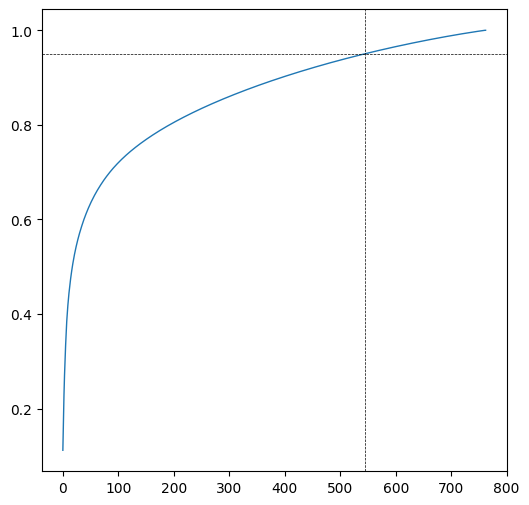

In [11]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(range(len(exp_vars_ratio)),exp_vars_ratio,linewidth=1)
ax.axvline(x=pos_exp_vars_ratio,c='black',linewidth=0.5, linestyle="dashed")
ax.axhline(y=exp_vars_ratio[pos_exp_vars_ratio],c='black',linewidth=0.5,linestyle="dashed")

## Plot PCA

In [13]:
pca_embedded_pc1_pc2=pd.DataFrame(data=pca_embedded[:,[0,1]], columns=['PC1','PC2'])
pca_embedded_pc1_pc2.shape
#pca_embedded_pc1_pc2.index = exp_mat_prot_coding.columns
#pca_embedded_pc1_pc2=pd.concat([pca_embedded_pc1_pc2,metadata_prot_coding['Subtype']],axis=1)

(763, 2)

In [14]:
pca_embedded_pc1_pc2.index = exp_mat_prot_coding.index

In [15]:
pca_embedded_pc1_pc2['Subtype'] = metadata_prot_coding['Subtype']

Text(0, 0.5, 'PC2 (5.98%)')

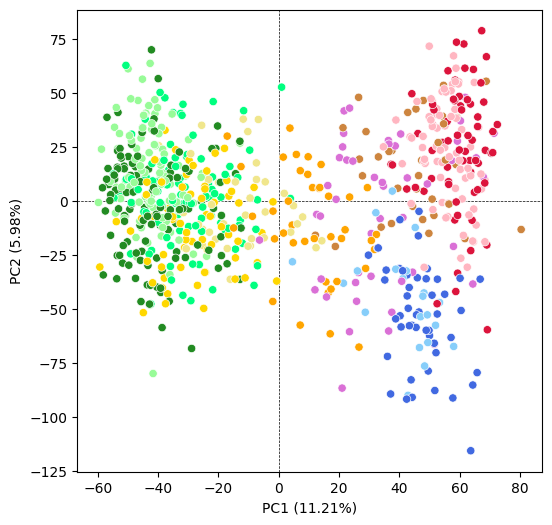

In [16]:
pal_subtype={'WNT_alpha':'royalblue',
             'WNT_beta':'lightskyblue',
             'SHH_alpha':'crimson',
             'SHH_beta':'peru',
             'SHH_gamma':'orchid',
             'SHH_delta':'lightpink',
             'Group3_alpha':'gold',
             'Group3_beta':'khaki',
             'Group3_gamma':'orange',
             'Group4_gamma':'forestgreen',
             'Group4_beta':'palegreen',
             'Group4_alpha':'springgreen'}

fig, ax = plt.subplots(1,1,figsize=(6,6))
plt.axvline(x=0,c='black',linewidth=0.5, linestyle="dashed",zorder=1) # add zorder
plt.axhline(y=0,c='black',linewidth=0.5,linestyle="dashed",zorder=1) 
ax.set_axisbelow(True)
sns.scatterplot(data = pca_embedded_pc1_pc2, x='PC1', y='PC2', hue='Subtype', legend=False, ax=ax, palette=pal_subtype)
ax.set_xlabel("PC1 ({:.2f}%)".format(pca.explained_variance_ratio_[0]*100))
ax.set_ylabel("PC2 ({:.2f}%)".format(pca.explained_variance_ratio_[1]*100))

In [18]:
from scipy.special import betainc

def optim_pearson(x,y):
    # Assumes inputs are DataFrames and computation is to be performed
    # pairwise between columns. We convert to arrays and reshape so calculation
    # is performed according to normal broadcasting rules along the last axis.
    x = np.asarray(x).T[:, np.newaxis, :]
    y = np.asarray(y).T
    n = x.shape[-1]

    # Compute Pearson correlation coefficient. We can't use `cov` or `corrcoef`
    # because they want to compute everything pairwise between rows of a
    # stacked x and y.
    xm = x.mean(axis=-1, keepdims=True)
    ym = y.mean(axis=-1, keepdims=True)
    cov = np.sum((x - xm) * (y - ym), axis=-1)/(n-1)
    sx = np.std(x, ddof=1, axis=-1)
    sy = np.std(y, ddof=1, axis=-1)
    rho = cov/(sx * sy)

    # Compute the two-sided p-values. See documentation of scipy.stats.pearsonr.
    ab = n/2 - 1
    x = (abs(rho) + 1)/2
    p = 2*(1-betainc(ab, ab, x))
    return rho, p

In [19]:
def gen_pairs_features(exp_mat,idx=0):
    for i in range(idx,exp_mat.shape[1]-1):
        yield idx,i+1

In [20]:
def remove_highly_corr_features(feat1,feat2,idx,rho_thresh=0.9):

    #rpval = pearsonr(feat1,feat2)
    rho = optim_pearson(feat1,feat2)

    if rho >= rho_thresh or -rho <= -rho_thresh :
        return idx
    else:
        return None

In [21]:
def chunkify_expr_mat(exp_mat,start=0,step=500):
    
    checkpoint = list(range(start,exp_mat.shape[1],step))+[exp_mat.shape[1]]
    
    for i in range(len(checkpoint)-1):
        yield checkpoint[i],checkpoint[i+1]

In [22]:
#for chunk in chunkify_expr_mat(exp_mat):
#    print(chunk)
chunk = (500,1000)
rho, p = optim_pearson(x=exp_mat[:,chunk[0]:chunk[1]],y=exp_mat[:,chunk[0]:chunk[1]])

In [23]:
def corr_select(rho,p,p_thresh=0.05,rho_thresh=0.9):

    p = np.where(p<=p_thresh,1,0)  
    #np.fill_diagonal(p,0)
    rho*=p
    
    return np.where(abs(rho) >= rho_thresh)

In [25]:
def fill_set_keep_and_set_remove(x,y,sx,sy,set_keep=None,set_remove=None):

    if set_keep is None:
        set_keep = set()
    if set_remove is None:
        set_remove = set()

    if len(x) != 0 and len(y) !=0:    
        for i,j in list(zip(x+sx,y+sy)):
            if i not in set_keep and j not in set_keep :
                if j in set_remove or  i in set_remove:
                    set_remove.update(set([i,j]))
                else :
                    set_keep.add(i)
                    set_remove.add(j)
            else :
                if i in set_keep:
                    set_remove.add(j)
                elif j in set_keep:
                    set_remove.add(i)
                    
    return set_keep,set_remove

In [26]:
chunks = [chunk for chunk in chunkify_expr_mat(exp_mat)]
chunks_array = np.array([[chunks[i],chunks[j]] for i in range(len(chunks)) for j in range(i,len(chunks))])

In [27]:
#toys_array = chunks_array[0:3]

In [28]:
#toys_array.shape[0]

In [30]:
p_thresh=0.05
rho_thresh=0.9

set_keep=set()
set_remove=set()
incr = int(chunks_array.shape[0]*0.05)

for i in range(chunks_array.shape[0]):

    load = int((i/chunks_array.shape[0])*100)
    
    if int(i)%incr == 0 :
        print(f"{load}%")
    
    chunk1=chunks_array[i][0]
    chunk2=chunks_array[i][1]

    rho, p = optim_pearson(x=exp_mat[:,chunk1[0]:chunk1[1]],y=exp_mat[:,chunk2[0]:chunk2[1]])
    
    p = np.where(p<=p_thresh,1,0)
    if (chunk1==chunk2).all():
        np.fill_diagonal(p,0)
    rho*=p

    idx = np.where(abs(rho) >= rho_thresh)

    set_keep,set_remove=fill_set_keep_and_set_remove(x=idx[0],y=idx[1],sx=chunk1[0],sy=chunk2[0],set_keep=set_keep,set_remove=set_remove)     

0%
4%
9%
14%
19%
24%
29%
34%
39%
44%
49%
54%
59%
64%
69%
74%
79%
84%
89%
94%
99%


In [33]:
columns=[exp_mat_prot_coding.columns[i] for i in set_remove]

In [48]:
exp_mat_prot_coding_nocorr=exp_mat_prot_coding.drop(columns=[exp_mat_prot_coding.columns[i] for i in set_remove],axis=1)

In [57]:
exp_mat_prot_coding_nocorr.to_csv(path_data_prot_coding + 'GSE85217_M_exp_763_MB_SubtypeStudy_TaylorLab_protein_coding_nocorr.csv')

In [ ]:
t = False

In [ ]:
%%time
if t:
    for i,pair in enumerate(gen_pairs_features(exp_mat,idx=1)):
        if i%1000 == 0:
            print(i)
        corr_pair = remove_highly_corr_features(feat1=exp_mat[:,pair[0]],feat2=exp_mat[:,pair[1]],idx=pair[1])
        if corr_pair is not None:
            print(corr_pair)

In [ ]:
%%time
if t:
    from concurrent.futures import ProcessPoolExecutor, as_completed
    idx=0
    while idx < exp_mat.shape[1]:
        if idx%100 == 0:
            print(idx)
        with ProcessPoolExecutor(max_workers=8) as executor:
            corr_feats = []
            futures = [executor.submit(remove_highly_corr_features,feat1=exp_mat[:,pair[0]],feat2=exp_mat[:,pair[1]],idx=pair[1]) for i,pair in enumerate(gen_pairs_features(exp_mat,idx=idx))]
            for future in as_completed(futures):
                result = future.result()
                if result is not None:
                    corr_feats.append(result)
        
            if len(corr_feats)>0:
                np.delete(exp_mat,corr_feats)
                print(corr_feats)
                print(exp_mat.shape)
            idx+=1
        